# BARC (OCES/DGFS) 2018 Recruitment Analysis

In [411]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Read Recruitment Data CSV file (obtained by converting PDF file downloaded from [BARC Online Exam Portal](http://www.barconlineexam.in/engineer/index.html)) into a Pandas Dataframe.

In [143]:
df = pd.read_csv("BARC.csv", index_col=0)
df[['G17','G18', 'Test']] = df[['G17','G18','Test']].apply(pd.to_numeric, errors='coerce')

### Preview the Dataframe.

In [144]:
df.head()

,Reg No,Sub,G17,G18,Test,Qualified,Remarks
Sl No,,,,,,,
1,18CE1000014,Civil,NaN,264.0,61.60,NO,Not Qualified for Interview
2,18CE1000029,Civil,NaN,NaN,18.52,NO,Not Qualified for Interview
3,18CE1000077,Civil,NaN,NaN,46.52,NO,Not Qualified for Interview
4,18CE1000081,Civil,NaN,NaN,9.91,NO,Not Qualified for Interview
5,18CE1000090,Civil,NaN,NaN,47.60,NO,Not Qualified for Interview


### Total Students Appeared & Qualified

In [145]:
n_total_appeared = len(df)
qualified = df[df['Qualified'] == 'YES']
n_qualified = len(qualified)
percent_qualified = 100 * n_qualified/n_total_appeared

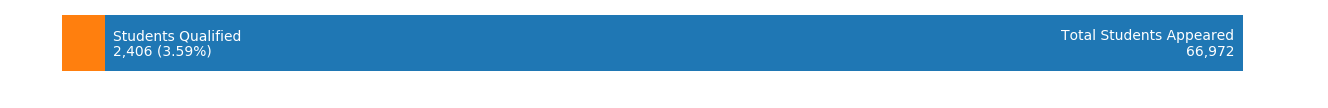

In [146]:
plt.rcdefaults()
fig, ax = plt.subplots()
fig.set_size_inches(16, 0.8)
ax.barh(0, n_total_appeared)
ax.barh(0, n_qualified)
ax.axis('off')

xloc = ax.patches[0].get_width() - 500
yloc = ax.patches[0].get_y() + ax.patches[0].get_height()/2.0
ax.text(xloc, yloc, "Total Students Appeared\n"+"{:,}".format(n_total_appeared), horizontalalignment='right', verticalalignment='center', color='white', clip_on=True)

xloc = ax.patches[1].get_width() + 500
yloc = ax.patches[1].get_y() + ax.patches[1].get_height()/2.0
ax.text(xloc, yloc, "Students Qualified\n%s (%.2f%%)" % ("{:,}".format(n_qualified), percent_qualified), horizontalalignment='left', verticalalignment='center', color='white', clip_on=True)

plt.show()

## Subject Wise Analysis

In [336]:
colors_sub = {'Mechanical': '#ef5350', 'Electrical': '#AB47BC', 'Electronics': '#5C6BC0', 'Civil': '#29B6F6', 
              'Computer Science': '#26A69A', 'Chemical': '#9CCC65', 'Instrumentation': '#FFEE58', 'Metallurgy': '#FFA726',
              'Nuclear': '#8D6E63'}

#### Appeared:

In [192]:
n_appeared_per_sub = df.groupby('Sub').size().sort_values(ascending = False)
percent_appeared_per_sub = 100*n_appeared_per_sub/n_appeared_per_sub.sum()

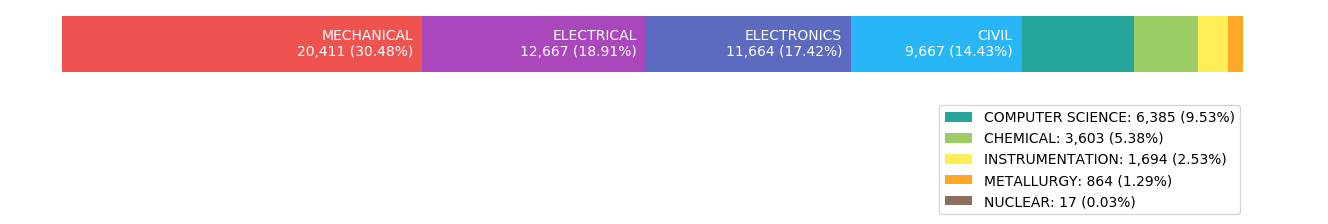

In [337]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 0.8)
prev_n = 0

plots = []
for sub, n in n_appeared_per_sub.iteritems():
    plots.append(ax.barh(0, n, left=prev_n, color=colors_sub[sub]))
    prev_n += n
ax.axis('off')

for patch, sub_n, percent in zip(ax.patches[:-5], n_appeared_per_sub.iteritems(), percent_appeared_per_sub):
    xloc = patch.get_x() + patch.get_width() - 500
    yloc = patch.get_y() + patch.get_height()/2.0
    ax.text(xloc, yloc, "%s\n%s (%.2f%%)" % (sub_n[0].upper(), "{:,}".format(sub_n[1]), percent), horizontalalignment='right', verticalalignment='center', color='white', clip_on=True)

legends = []
sub_n = list(zip(*n_appeared_per_sub.iteritems()))
for sub, n, percent in zip(sub_n[0][-5:], sub_n[1][-5:], percent_appeared_per_sub[-5:]):
    legends.append("%s: %s (%.2f%%)" % (sub.upper(), "{:,}".format(n), percent))
plt.legend(plots[-5:], legends, bbox_to_anchor=(-0.05, -0.5, 1., 0.), loc=1, borderaxespad=0.)
    
plt.show()

#### Qualified from Total Appeared:

In [304]:
n_qualified_per_sub = qualified.groupby('Sub').size().sort_values(ascending = False)
percent_qualified_per_sub = 100*n_qualified_per_sub/n_qualified_per_sub.sum()

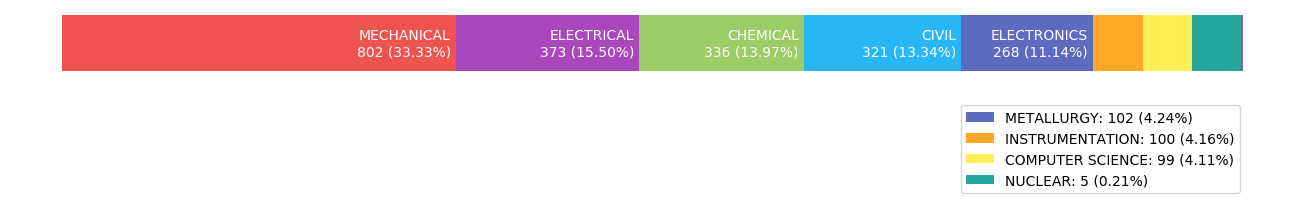

In [335]:
plt.rcdefaults()
fig, ax = plt.subplots()
fig.set_size_inches(16, 0.8)
prev_n = 0

plots = []
for sub, n in n_qualified_per_sub.iteritems():
    plots.append(ax.barh(0, n, left=prev_n, color=colors_sub[sub]))
    prev_n += n
ax.axis('off')

for patch, sub_n, percent in zip(ax.patches[:-4], n_qualified_per_sub.iteritems(), percent_qualified_per_sub):
    xloc = patch.get_x() + patch.get_width() - 10
    yloc = patch.get_y() + patch.get_height()/2.0
    ax.text(xloc, yloc, "%s\n%s (%.2f%%)" % (sub_n[0].upper(), "{:,}".format(sub_n[1]), percent), horizontalalignment='right', verticalalignment='center', color='white', clip_on=True)

legends = []
sub_n = list(zip(*n_qualified_per_sub.iteritems()))
for sub, n, percent in zip(sub_n[0][-4:], sub_n[1][-4:], percent_qualified_per_sub[-4:]):
    legends.append("%s: %s (%.2f%%)" % (sub.upper(), "{:,}".format(n), percent))
plt.legend(plots[-5:], legends, bbox_to_anchor=(-0.05, -0.5, 1., 0.), loc=1, borderaxespad=0.)
    
plt.show()

#### Qualification Percentage Per Subject

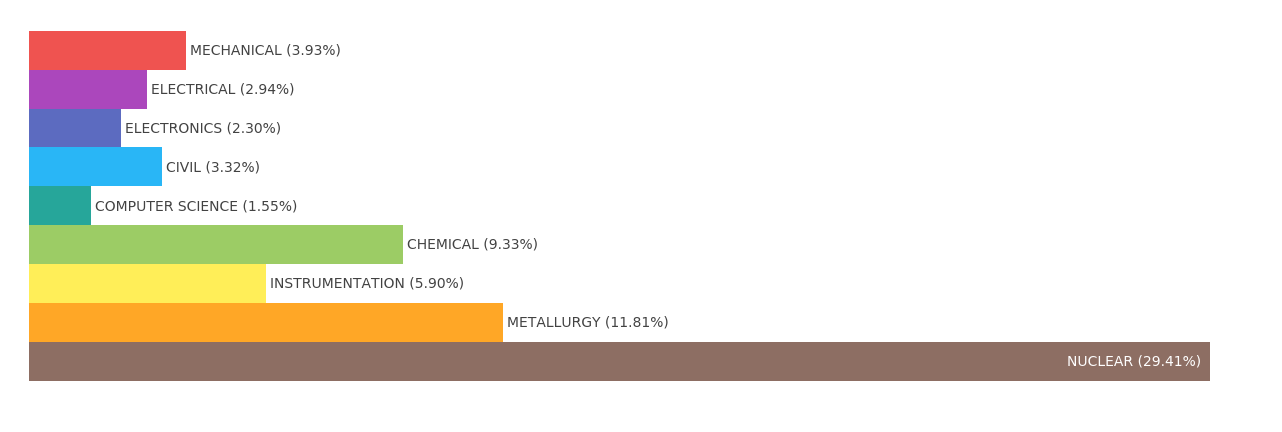

In [494]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 5)

percent_list = []
for sub_n, i in zip(n_appeared_per_sub.iteritems(), reversed(range(len(n_appeared_per_sub)))):
    percent = 100 * n_qualified_per_sub.loc[sub_n[0]]/sub_n[1]
    ax.barh(i, percent, height=1, left=prev_n, color=colors_sub[sub_n[0]])
    percent_list.append([sub_n[0], percent])

ax.axis('off')

for patch, sub_percent in zip(ax.patches[:-1], percent_list):
    xloc = patch.get_x() + patch.get_width() + 0.1
    yloc = patch.get_y() + patch.get_height()/2.0
    ax.text(xloc, yloc, "%s (%.2f%%)" % (sub_percent[0].upper(), sub_percent[1]), horizontalalignment='left', verticalalignment='center', color='#424242', clip_on=True)

xloc = ax.patches[-1].get_x() + ax.patches[-1].get_width() - 0.2
yloc = ax.patches[-1].get_y() + ax.patches[-1].get_height()/2.0
ax.text(xloc, yloc, "%s (%.2f%%)" % (percent_list[-1][0].upper(), percent_list[-1][1]), horizontalalignment='right', verticalalignment='center', color='white', clip_on=True)

plt.show()

## Method Analysis

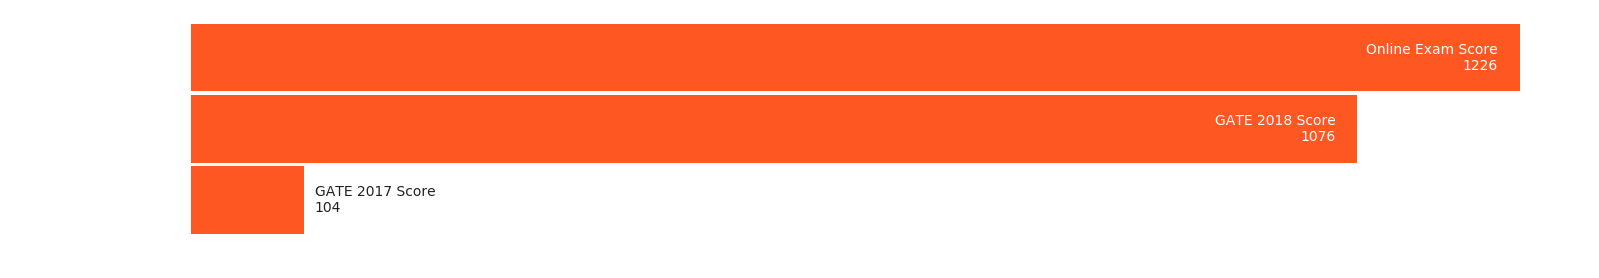

In [495]:
n_qualified_per_method = qualified.groupby(['Remarks']).size()

plt.rcdefaults()
fig, ax = plt.subplots()
fig.set_size_inches(18, 3)
prev_n = 0

n_students = []
for method, n in n_qualified_per_method.iteritems():
    ax.barh(method, n, height=0.95, color='#FF5722')
    n_students.append(n)
    
ax.axis('off')

xloc = ax.patches[0].get_x() + ax.patches[0].get_width() + 10
yloc = ax.patches[0].get_y() + ax.patches[0].get_height()/2.0
ax.text(xloc, yloc, "GATE 2017 Score\n%d" % n_students[0], horizontalalignment='left', verticalalignment='center', color='#212121', clip_on=True)

xloc = ax.patches[1].get_x() + ax.patches[1].get_width() - 20
yloc = ax.patches[1].get_y() + ax.patches[1].get_height()/2.0
ax.text(xloc, yloc, "GATE 2018 Score\n%d" % n_students[1], horizontalalignment='right', verticalalignment='center', color='white', clip_on=True)

xloc = ax.patches[2].get_x() + ax.patches[2].get_width() - 20
yloc = ax.patches[2].get_y() + ax.patches[2].get_height()/2.0
ax.text(xloc, yloc, "Online Exam Score\n%d" % n_students[2], horizontalalignment='right', verticalalignment='center', color='white', clip_on=True)


plt.show()

### Score Analysis (Electrical)

c:\users\admin\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


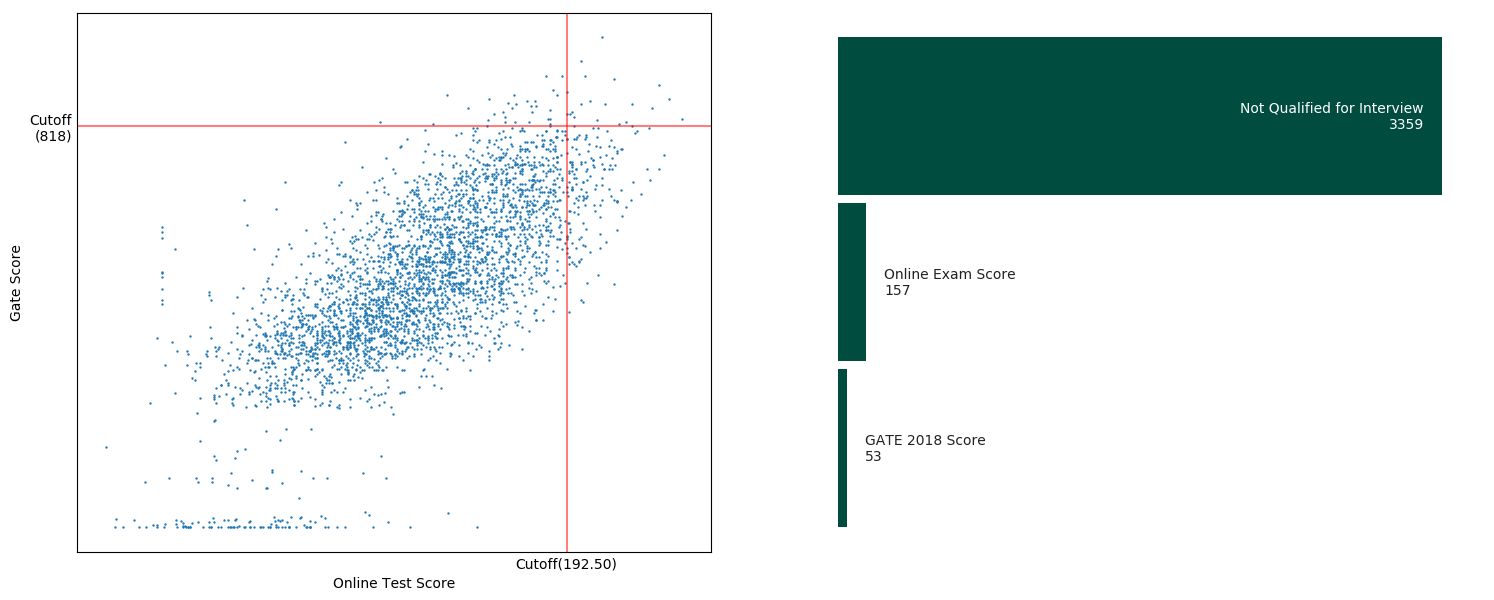

In [533]:
df_ee = df[df['Sub'] == 'Electrical']
df_ee['G'] = df_ee[['G17', 'G18']].max(axis=1)
df_ee = df_ee[np.isfinite(df_ee['Test']) & np.isfinite(df_ee['G'])]

plt.rcdefaults()
fig, axs = plt.subplots(1, 2, figsize = (5,2))
fig.set_size_inches(18, 7)

axs[0].scatter(df_ee['Test'], df_ee['G'], s=0.5)
axs[0].axvline(192.50, color='red', alpha=0.5)
axs[0].axhline(818, color='red', alpha=0.5)

axs[0].set_xlabel('Online Test Score')
axs[0].set_ylabel('Gate Score')
axs[0].tick_params(axis=u'both', which=u'both',length=0)

plt.sca(axs[0])
plt.xticks([192.5], ['Cutoff(192.50)'])
plt.yticks([818], ['Cutoff\n(818)'])

n_ee_per_method = df_ee.groupby(['Remarks']).size().sort_values()

axs[1].axis('off')
n_students = []
for method, n in n_ee_per_method.iteritems():
    axs[1].barh(method, n, height=0.95, color='#004D40')
    n_students.append(n)

xloc = axs[1].patches[0].get_x() + axs[1].patches[0].get_width() + 100
yloc = axs[1].patches[0].get_y() + axs[1].patches[0].get_height()/2.0
axs[1].text(xloc, yloc, "GATE 2018 Score\n%d" % n_students[0], horizontalalignment='left', verticalalignment='center', color='#212121', clip_on=True)

xloc = axs[1].patches[1].get_x() + axs[1].patches[1].get_width() + 100
yloc = axs[1].patches[1].get_y() + axs[1].patches[1].get_height()/2.0
axs[1].text(xloc, yloc, "Online Exam Score\n%d" % n_students[1], horizontalalignment='left', verticalalignment='center', color='#212121', clip_on=True)

xloc = axs[1].patches[2].get_x() + axs[1].patches[2].get_width() - 100
yloc = axs[1].patches[2].get_y() + axs[1].patches[2].get_height()/2.0
axs[1].text(xloc, yloc, "Not Qualified for Interview\n%d" % n_students[2], horizontalalignment='right', verticalalignment='center', color='white', clip_on=True)

plt.show()